# Decision Boundary Homework



In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Sklearn has a couple of "standard" example data generators for use in working with classification models, these are some models used to synthesize data
for practice purposes.  Below are a couple of examples.

These are both pretty simple,  they are using just two variables

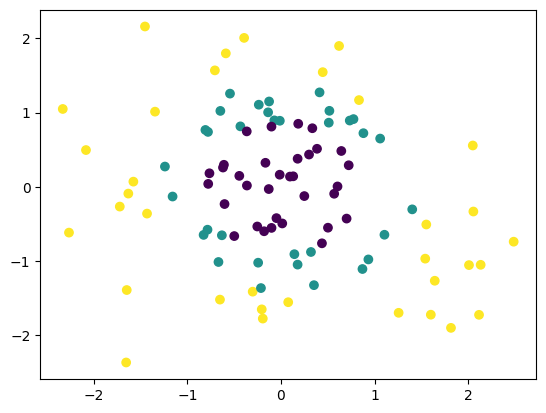

In [ ]:
from sklearn.datasets import make_gaussian_quantiles, make_classification

X,y=make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X[:,0],X[:,1], c=y)

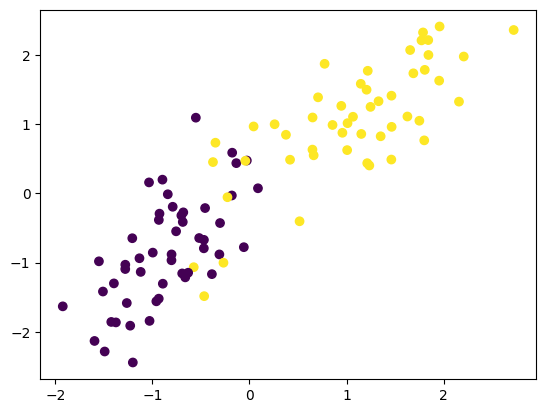

In [ ]:
X1, y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1
)
plt.scatter(X1[:,0],X1[:,1], c=y1)

Question/Action


- For each of these data sets,  (X,y) and (X1,y1)

a.) Generate two test sets (X_test, y_test),(X1_test,y1_test), by running the generators again, with the same parameters.
     This will generate test sets with the same distributions but different values.

b.) Build some a number of classifiers for each set
    -logistic
    -the logistic again, but add columns for X1^2 and X2^2 as predictors
    -neural net
    -random forest
    -two different boosted methods

    Do some basic hyperparameter searches on each model (except the logistic)

c.) Write a function that will allow you to pass in the model and the X, y set and then generate from that a plot of the decision boundary for the example

d.) Use your function to plot out the decision boundaries for each of your models and for the two data sets

e.) Based on your examination of the two data sets and the resulting plots,  what can you say about the nature of the models?
    -which of them can generate curved boundaries?  Which are all straight line boundaries?
    -which looks most severely overfit?

###a.) Generate two test sets (X_test, y_test),(X1_test,y1_test), by running the generators again, with the same parameters. This will generate test sets with the same distributions but different values.

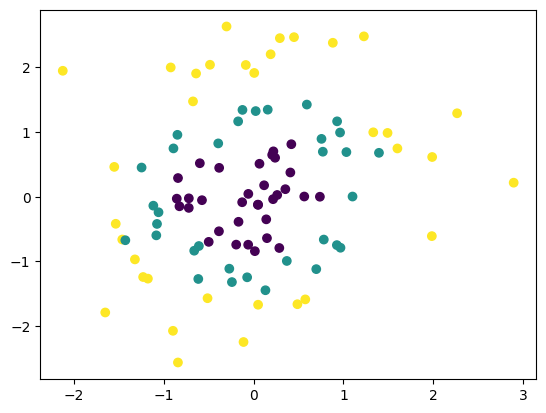

In [ ]:
X_test,y_test=make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X_test[:,0],X_test[:,1], c=y_test)

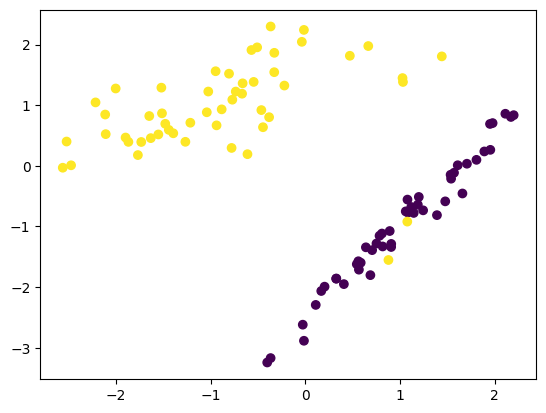

In [ ]:
X1_test, y1_test = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1
)
plt.scatter(X1_test[:,0],X1_test[:,1], c=y1_test)

b.) Build some a number of classifiers for each set -logistic -the logistic again, but add columns for X1^2 and X2^2 as predictors -neural net -random forest -two different boosted methods

In [31]:
from sklearn.linear_model import LogisticRegression

modelLogistic1 = LogisticRegression()
# fit the model
modelLogistic1.fit(X, y)

modelLogistic1_pred = modelLogistic1.predict(X_test)
print (accuracy_score(y_test,modelLogistic1_pred))


modelLogistic2 = LogisticRegression()
# fit the model
modelLogistic2.fit(X1, y1)

modelLogistic2_pred = modelLogistic2.predict(X1_test)
print (accuracy_score(y1_test,modelLogistic2_pred))


#modelLogistic1 = LogisticRegression()
# fit the model
#modelLogistic1.fit(X_test, y_test)

#modelLogistic1 = LogisticRegression()
# fit the model
#modelLogistic1.fit(X1_test, y1_test)


0.33
0.25


In [78]:

modelLogisticV1 = LogisticRegression()
# fit the model
#modelLogisticV1.fit(np.concatenate((X,X**2),axis=1), y)
modelLogisticV1.fit(X**2, y)
modelLogisticV1_pred = modelLogisticV1.predict(X_test**2)





modelLogisticV2 = LogisticRegression()
# fit the model
#modelLogisticV2.fit(np.concatenate((X1,X1**2),axis=1), y1)
modelLogisticV2.fit(X1**2, y1)

modelLogisticV2_pred = modelLogisticV2.predict(X1_test**2)



print (accuracy_score(y_test,modelLogisticV1_pred))
print (accuracy_score(y1_test,modelLogisticV2_pred))

#modelLogisticV3 = LogisticRegression()
# fit the model
#modelLogisticV3.fit(np.concatenate((X_test,X_test**2),axis=1), y_test)

#modelLogisticV4 = LogisticRegression()
# fit the model
#modelLogisticV4.fit(np.concatenate((X1_test,X1_test**2),axis=1), y1_test)

0.95
0.47


In [26]:
# Nural Net

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, batch_size=int(min(200/2, X.shape[0]/2)),max_iter=500,hidden_layer_sizes=(13,6,), verbose=True, warm_start=False)
clf.fit(X, y)


clf_pred = clf.predict(X_test)





clf1 = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, batch_size=int(min(200/2, X.shape[0]/2)),max_iter=500,hidden_layer_sizes=(13,6,), verbose=True, warm_start=False)
clf1.fit(X1, y1)

#clf2 = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, batch_size=int(min(200/2, X.shape[0]/2)),max_iter=500,hidden_layer_sizes=(13,6,), verbose=True, warm_start=False)
#clf2.fit(X1_test, y1_test)

#clf3 = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, batch_size=int(min(200/2, X.shape[0]/2)),max_iter=500,hidden_layer_sizes=(13,6,), verbose=True, warm_start=False)
#clf3.fit(X_test, y_test)
clf1_pred = clf1.predict(X1_test)


print (accuracy_score(y_test,clf_pred))
print (accuracy_score(y1_test,clf1_pred))


Iteration 1, loss = 1.25246050
Iteration 2, loss = 1.24335680
Iteration 3, loss = 1.23481095
Iteration 4, loss = 1.22736959
Iteration 5, loss = 1.21855166
Iteration 6, loss = 1.21241563
Iteration 7, loss = 1.20435838
Iteration 8, loss = 1.19792055
Iteration 9, loss = 1.19154283
Iteration 10, loss = 1.18510584
Iteration 11, loss = 1.17988901
Iteration 12, loss = 1.17455877
Iteration 13, loss = 1.16931349
Iteration 14, loss = 1.16389207
Iteration 15, loss = 1.15928525
Iteration 16, loss = 1.15448941
Iteration 17, loss = 1.15027063
Iteration 18, loss = 1.14645438
Iteration 19, loss = 1.14242135
Iteration 20, loss = 1.13865470
Iteration 21, loss = 1.13492207
Iteration 22, loss = 1.13115301
Iteration 23, loss = 1.12851923
Iteration 24, loss = 1.12577570
Iteration 25, loss = 1.12283303
Iteration 26, loss = 1.12006514
Iteration 27, loss = 1.11770219
Iteration 28, loss = 1.11504854
Iteration 29, loss = 1.11321852
Iteration 30, loss = 1.11116315
Iteration 31, loss = 1.10886888
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 0.86787407
Iteration 5, loss = 0.85597044
Iteration 6, loss = 0.84550253
Iteration 7, loss = 0.83392755
Iteration 8, loss = 0.82307967
Iteration 9, loss = 0.81202447
Iteration 10, loss = 0.80132376
Iteration 11, loss = 0.79016590
Iteration 12, loss = 0.77962600
Iteration 13, loss = 0.76890119
Iteration 14, loss = 0.75822536
Iteration 15, loss = 0.74738611
Iteration 16, loss = 0.73733969
Iteration 17, loss = 0.72669745
Iteration 18, loss = 0.71637174
Iteration 19, loss = 0.70604750
Iteration 20, loss = 0.69583577
Iteration 21, loss = 0.68574226
Iteration 22, loss = 0.67631065
Iteration 23, loss = 0.66651566
Iteration 24, loss = 0.65715326
Iteration 25, loss = 0.64756990
Iteration 26, loss = 0.63782130
Iteration 27, loss = 0.62857612
Iteration 28, loss = 0.61919359
Iteration 29, loss = 0.61004063
Iteration 30, loss = 0.60090847
Iteration 31, loss = 0.59212838
Iteration 32, loss = 0.58299690
Iteration 33, loss = 0.57400075
Iteration 34, loss = 0.56544869
Iteration 35, 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [60]:
#-random forest

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=50, n_jobs=-1)
rnd_clf.fit(X, y)



y_pred_rf = rnd_clf.predict(X_test)

print (sum(y_pred_rf==y_test)/y_test.size)

0.88


In [61]:
rnd_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=8, n_jobs=-1)
rnd_clf2.fit(X1, y1)


y_pred_rf = rnd_clf.predict(X1_test)

print (sum(y_pred_rf==y1_test)/y1_test.size)

0.14


In [52]:
# Gradient Boosting


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
gb_clf=GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1, max_depth=1)

gb_clf.fit(X, y)

y_pred_gb = rnd_clf.predict(X_test)
print (accuracy_score(y_test,y_pred_gb))




0.42


In [53]:
# Gradient Boosting2


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
gb_clf2=GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1, max_depth=1)

gb_clf2.fit(X1, y1)

y2_pred_gb = rnd_clf.predict(X1_test)
print (accuracy_score(y1_test,y2_pred_gb))


0.21


In [46]:
import xgboost

xgb_reg = xgboost.XGBClassifier()
xgb_reg.fit(X,y)
y_pred_XG = xgb_reg.predict(X_test)

print (accuracy_score(y_test,y_pred))

0.85


In [47]:
import xgboost

xgb_reg2 = xgboost.XGBClassifier()
xgb_reg2.fit(X1,y1)
y1_pred = xgb_reg.predict(X1_test)

print (accuracy_score(y1_test,y1_pred))

0.15


###c.) Write a function that will allow you to pass in the model and the X, y set and then generate from that a plot of the decision boundary for the example

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [81]:
def decisionBoundary(model, X,y,special):
  # define bounds of the domain
  min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
  min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
  # define the x and y scale
  x1grid = np.arange(min1, max1, 0.1)
  x2grid = np.arange(min2, max2, 0.1)
  # create all of the lines and rows of the grid
  xx, yy = np.meshgrid(x1grid, x2grid)
  # flatten each grid to a vector
  r1, r2 = xx.flatten(), yy.flatten()
  r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
  # horizontal stack vectors to create x1,x2 input for the model
  grid = np.hstack((r1,r2))

  if special == False:
    y_pred_grid = model.predict(grid)
  else:
    y_pred_grid = model.predict(grid**2)
  zz = y_pred_grid.reshape(xx.shape)
  plt.contourf(xx, yy, zz, cmap='Paired')

  for class_value in range(len(np.unique(y))):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')




##d.) Use your function to plot out the decision boundaries for each of your models and for the two data sets

XGboost

<ipython-input-81-125e0d01568d>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


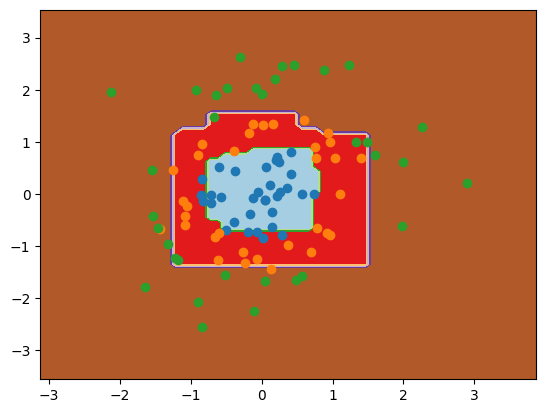

In [96]:
#XHboost
decisionBoundary(xgb_reg,X_test,y_test,False)

<ipython-input-81-125e0d01568d>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


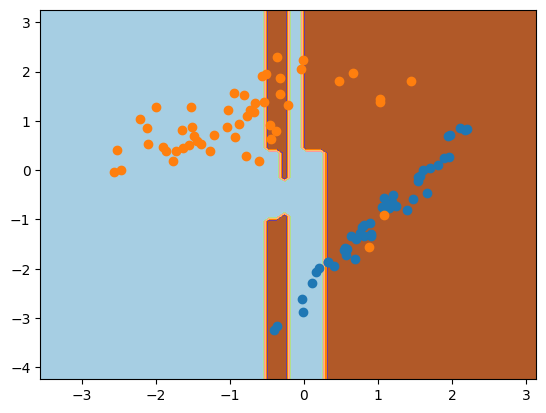

In [95]:
decisionBoundary(xgb_reg2,X1_test,y1_test,False)

<ipython-input-81-125e0d01568d>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


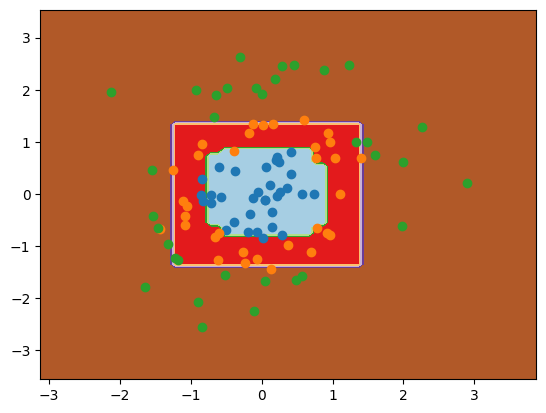

In [94]:
#Gradient Boost

decisionBoundary(gb_clf,X_test,y_test,False)

<ipython-input-81-125e0d01568d>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


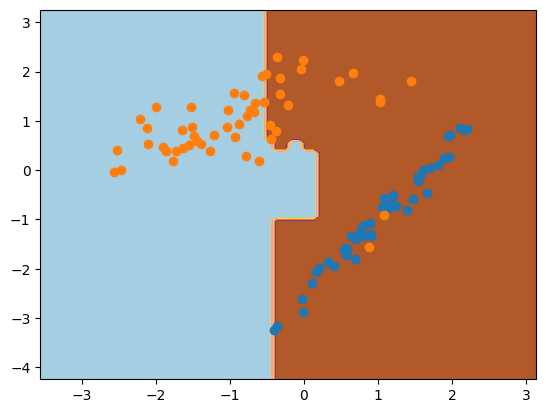

In [93]:
decisionBoundary(gb_clf2,X1_test,y1_test,False)

<ipython-input-81-125e0d01568d>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


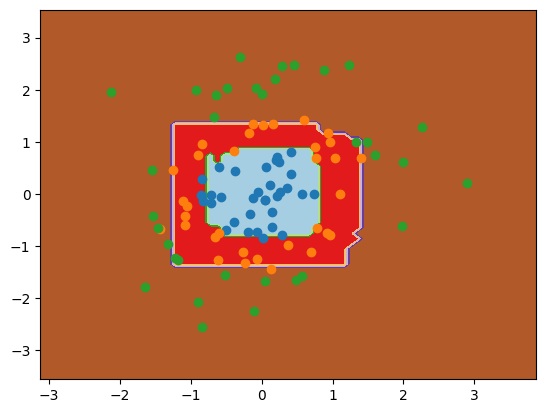

In [92]:
# Random Forest
decisionBoundary(rnd_clf,X_test,y_test,False)


<ipython-input-81-125e0d01568d>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


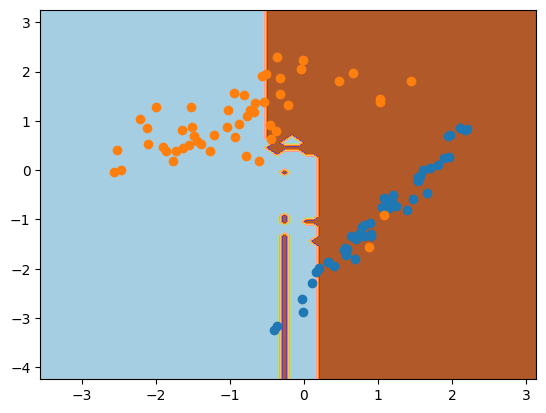

In [91]:
decisionBoundary(rnd_clf2,X1_test,y1_test,False)

<ipython-input-81-125e0d01568d>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


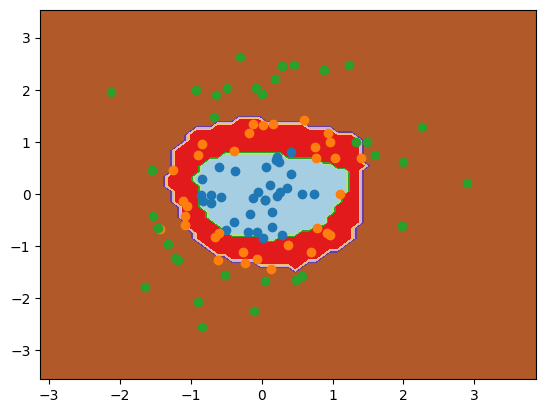

In [90]:
# Nural net


decisionBoundary(clf,X_test,y_test,False)

<ipython-input-81-125e0d01568d>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


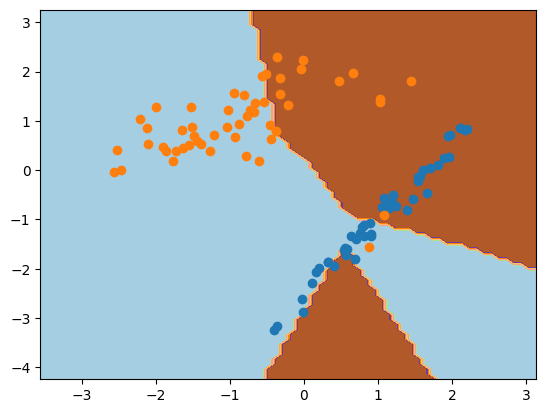

In [89]:
decisionBoundary(clf1,X1_test,y1_test,False)

<ipython-input-81-125e0d01568d>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


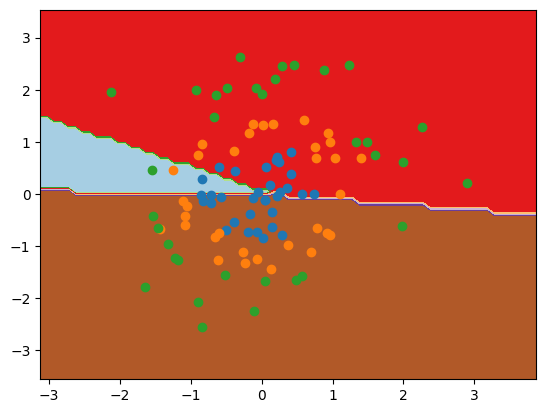

In [88]:
#Logistic Regular


decisionBoundary(modelLogistic1,X_test,y_test,False)


<ipython-input-81-125e0d01568d>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


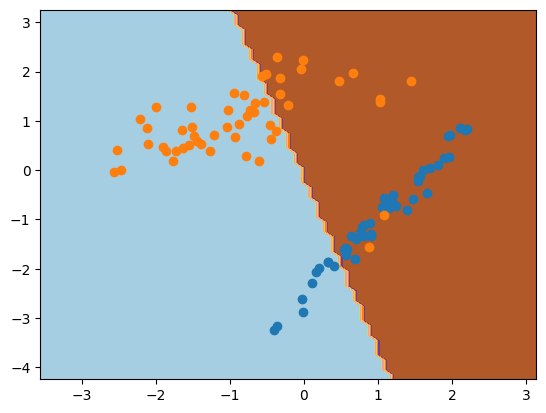

In [87]:
decisionBoundary(modelLogistic2,X1_test,y1_test,False)

<ipython-input-81-125e0d01568d>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


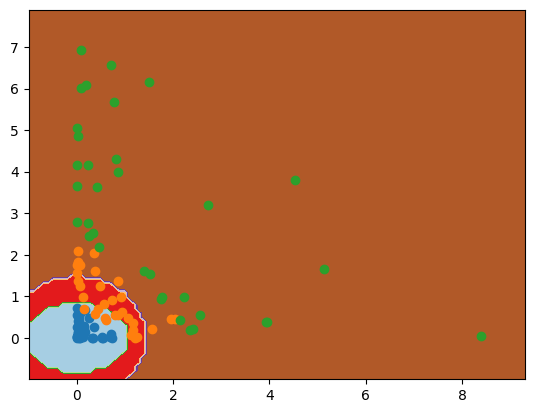

In [97]:
#LogisticX^2 and X1^2



decisionBoundary(modelLogisticV1,X_test**2,y_test,True)

<ipython-input-81-125e0d01568d>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


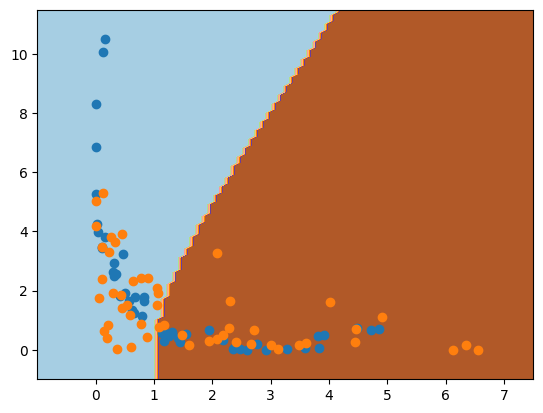

In [86]:
decisionBoundary(modelLogisticV2,X1_test**2,y1_test,True)

e.) Based on your examination of the two data sets and the resulting plots,  what can you say about the nature of the models?
    -which of them can generate curved boundaries?  Which are all straight line boundaries?

Curved : LogisticX^2 and X1^2,Nural net
Stright: XGboost, Gradient boost, random forest , regualr logistic
    -which looks most severely overfit?
modelLogisticV1 lossts most severly overfit.